In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("D:/Data Analyse Projects/Human Attention Decay Analyzer/data/screen_time_app_usage.csv")
df.head()

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive
0,1051,1/20/2025,Camera,Utilities,24.53,2,7,False
1,1088,1/21/2025,Chrome,Utilities,19.78,3,2,False
2,1052,1/22/2025,Spotify,Entertainment,32.03,1,6,False
3,1028,1/23/2025,Google Maps,Utilities,19.10,2,5,False
4,1034,1/24/2025,Instagram,Social,25.19,1,5,False


In [17]:
df.info()
df.isna().sum()

<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3000 non-null   int64  
 1   date             3000 non-null   str    
 2   app_name         3000 non-null   str    
 3   category         3000 non-null   str    
 4   screen_time_min  3000 non-null   float64
 5   launches         3000 non-null   int64  
 6   interactions     3000 non-null   int64  
 7   is_productive    3000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), str(3)
memory usage: 167.1 KB


user_id            0
date               0
app_name           0
category           0
screen_time_min    0
launches           0
interactions       0
is_productive      0
dtype: int64

In [18]:
df = df[df['screen_time_min'] > 0]

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['attention_intensity'] = df['interactions'] / df['screen_time_min']

In [23]:
df['fragmentation'] = df['launches'] / df['screen_time_min']

In [24]:
bins = [0, 2, 5, 10, 20, 1000]
labels = ['0-2', '2-5', '5-10', '10-20', '20+']
df['time_bucket'] = pd.cut(df['screen_time_min'], bins=bins, labels=labels)

In [28]:
decay = (
    df.groupby('time_bucket')['user_id']
    .nunique()
    .sort_index(ascending=True)
)

decay_percent = decay / decay.iloc[0] * 100

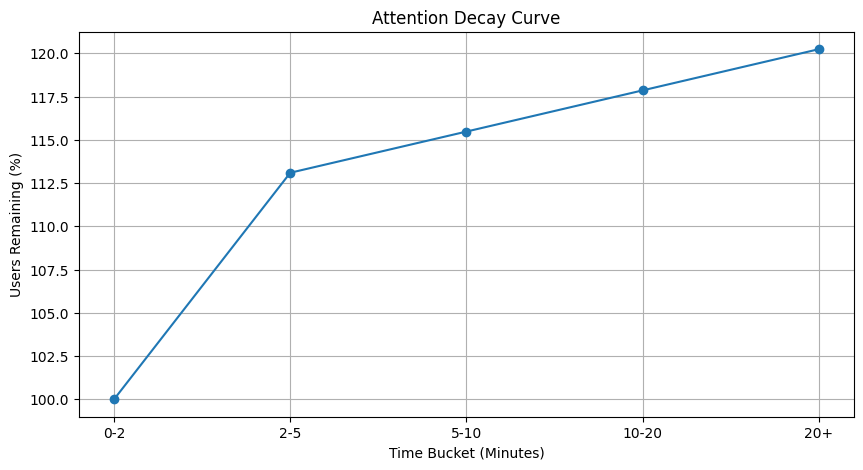

In [27]:
plt.figure(figsize=(10,5))
plt.plot(decay_percent.index, decay_percent.values, marker='o')
plt.title("Attention Decay Curve")
plt.xlabel("Time Bucket (Minutes)")
plt.ylabel("Users Remaining (%)")
plt.grid(True)
plt.show()


In [35]:
category_attention = df.groupby('category')['screen_time_min'].mean()
category_attention


category
Entertainment    29.984513
Productivity     29.592430
Social           31.131429
Utilities        28.888848
Name: screen_time_min, dtype: float64

In [36]:
category_attention = df.groupby('category')['screen_time_min'].mean()
category_attention

category
Entertainment    29.984513
Productivity     29.592430
Social           31.131429
Utilities        28.888848
Name: screen_time_min, dtype: float64

In [38]:
df.to_csv("D:/Data Analyse Projects/Human Attention Decay Analyzer/output/attention_cleaned.csv", index=False)


In [39]:
decay_df = decay_percent.reset_index()
decay_df.columns = ['time_bucket', 'users_remaining_percent']
decay_df.to_csv("D:/Data Analyse Projects/Human Attention Decay Analyzer/output/attention_decay.csv", index=False)


OSError: Cannot save file into a non-existent directory: '..\output'